# Deep Learning Assignment – CNN on Fashion MNIST & CIFAR-10

**Name: Abhishek Tiwari**  
**Roll Number: 23EJDAI002**   
**GitHub Repository : https://github.com/abhishektiwari4167/Deep-learning**     

This notebook implements:

1. CNN based classification on Fashion MNIST  
2. CNN based classification on CIFAR-10  

Evaluation Metrics Used:
- Accuracy Plot  
- Loss Plot  
- Confusion Matrix  
- Classification Report  


### Importing Required Libraries

TensorFlow/Keras is used to build CNN models.  
Matplotlib and Seaborn are used for visualization.  
Sklearn is used for performance metrics.


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist, cifar10

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

/Users/abhishektiwari/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Loading and Preprocessing Fashion MNIST

- Images are 28x28 grayscale  
- Normalize pixel values to range 0–1  
- Reshape for CNN input (add channel dimension)


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1,28,28,1) / 255.0
x_test  = x_test.reshape(-1,28,28,1) / 255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### CNN Model for Fashion MNIST

Architecture:
- 2 Convolution layers  
- MaxPooling  
- Dropout to prevent overfitting  
- Fully connected dense layers  


In [3]:
fashion_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

fashion_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

fashion_model.summary()

/Users/abhishektiwari/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training Fashion MNIST CNN


In [4]:
history_f = fashion_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7288 - loss: 0.7586 - val_accuracy: 0.8577 - val_loss: 0.3895
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8654 - loss: 0.3688 - val_accuracy: 0.8755 - val_loss: 0.3335
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8864 - loss: 0.3099 - val_accuracy: 0.8838 - val_loss: 0.3177
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8988 - loss: 0.2727 - val_accuracy: 0.8982 - val_loss: 0.2799
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9060 - loss: 0.2559 - val_accuracy: 0.9003 - val_loss: 0.2691
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9124 - loss: 0.2346 - val_accuracy: 0.9063 - val_loss: 0.2477
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9211 - loss: 0.2105 - val_accuracy: 0.9095 - val_loss: 0.2493
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9252 - loss: 0.2004 - val_accuracy: 0.

### Accuracy Plot – Fashion MNIST


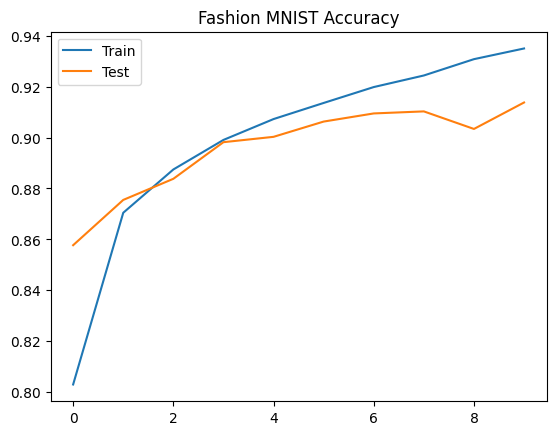

In [5]:
plt.plot(history_f.history['accuracy'], label='Train')
plt.plot(history_f.history['val_accuracy'], label='Test')
plt.title("Fashion MNIST Accuracy")
plt.legend()
plt.show()

### Loss Plot – Fashion MNIST


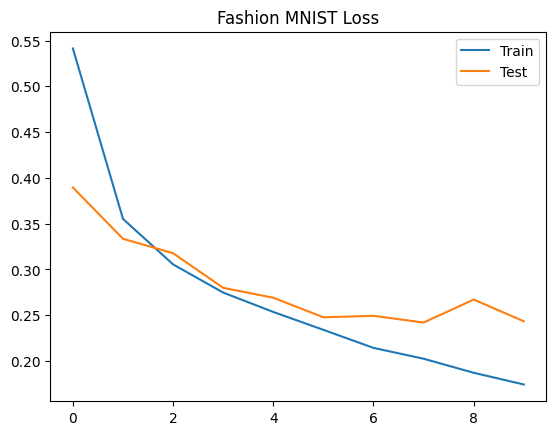

In [6]:
plt.plot(history_f.history['loss'], label='Train')
plt.plot(history_f.history['val_loss'], label='Test')
plt.title("Fashion MNIST Loss")
plt.legend()
plt.show()

### Confusion Matrix & Classification Report


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.87      0.87      1000
           3       0.91      0.92      0.91      1000
           4       0.87      0.88      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.70      0.74      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



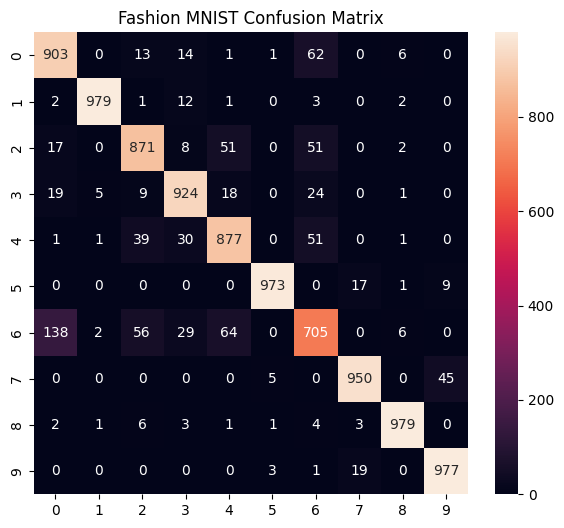

In [7]:
y_pred = np.argmax(fashion_model.predict(x_test), axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Fashion MNIST Confusion Matrix")
plt.show()

### CIFAR-10 Dataset

- 32x32 RGB images  
- 10 classes (airplane, car, bird, cat, deer, dog, frog, horse, ship, truck)


In [8]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar10.load_data()

x_train_c = x_train_c / 255.0
x_test_c  = x_test_c / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 64s 0us/step


### CNN Architecture for CIFAR-10


In [9]:
cifar_model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

cifar_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/Users/abhishektiwari/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training CIFAR

In [10]:
history_c = cifar_model.fit(
    x_train_c, y_train_c,
    validation_data=(x_test_c, y_test_c),
    epochs=12,
    batch_size=64
)

Epoch 1/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2937 - loss: 1.8840 - val_accuracy: 0.5340 - val_loss: 1.2725
Epoch 2/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5314 - loss: 1.3146 - val_accuracy: 0.5857 - val_loss: 1.1545
Epoch 3/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5944 - loss: 1.1520 - val_accuracy: 0.6262 - val_loss: 1.0607
Epoch 4/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6347 - loss: 1.0431 - val_accuracy: 0.6634 - val_loss: 0.9487
Epoch 5/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6690 - loss: 0.9381 - val_accuracy: 0.6735 - val_loss: 0.9340
Epoch 6/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6925 - loss: 0.8829 - val_accuracy: 0.7023 - val_loss: 0.8637
Epoch 7/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7153 - loss: 0.8195 - val_accuracy: 0.6995 - val_loss: 0.8762
Epoch 8/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7269 - loss: 0.7898 - val_ac

### Accuracy Plot

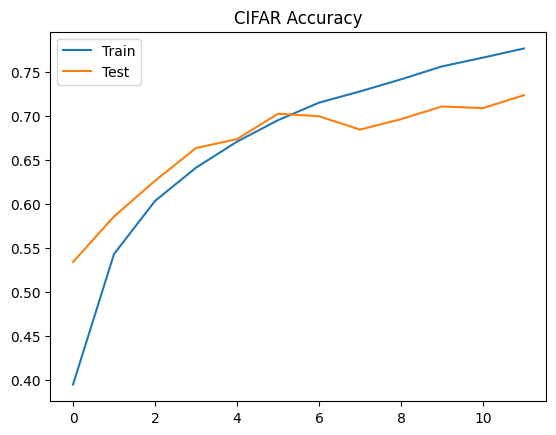

In [11]:
plt.plot(history_c.history['accuracy'], label='Train')
plt.plot(history_c.history['val_accuracy'], label='Test')
plt.title("CIFAR Accuracy")
plt.legend()
plt.show()

### Loss Plot

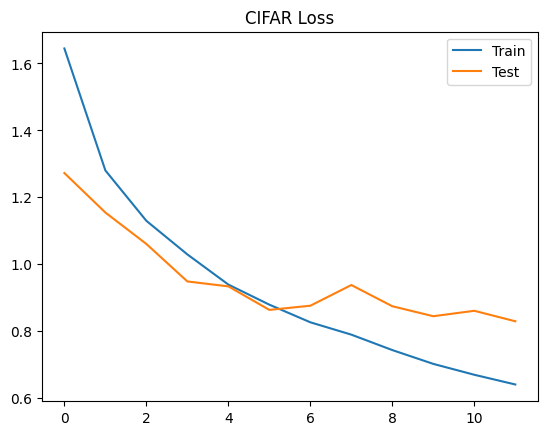

In [12]:
plt.plot(history_c.history['loss'], label='Train')
plt.plot(history_c.history['val_loss'], label='Test')
plt.title("CIFAR Loss")
plt.legend()
plt.show()

### Metrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1000
           1       0.85      0.85      0.85      1000
           2       0.76      0.48      0.59      1000
           3       0.56      0.55      0.55      1000
           4       0.66      0.68      0.67      1000
           5       0.66      0.59      0.63      1000
           6       0.69      0.87      0.77      1000
           7       0.70      0.80      0.75      1000
           8       0.82      0.82      0.82      1000
           9       0.76      0.86      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



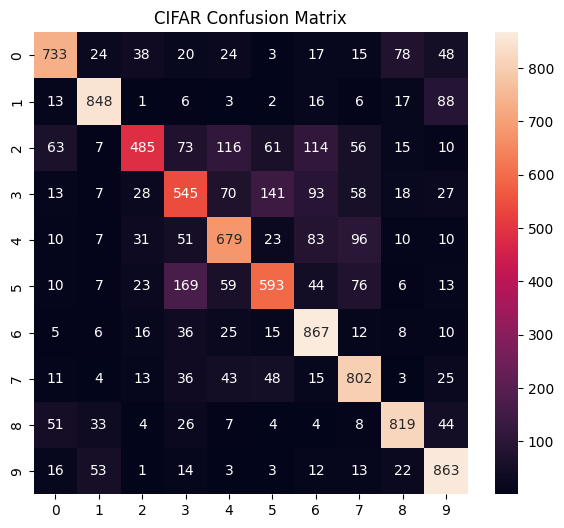

In [13]:
y_pred_c = np.argmax(cifar_model.predict(x_test_c), axis=1)

print(classification_report(y_test_c, y_pred_c))

cm_c = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(7,6))
sns.heatmap(cm_c, annot=True, fmt='d')
plt.title("CIFAR Confusion Matrix")
plt.show()

## Conclusion

1. Two CNN models were successfully implemented:
   - Fashion MNIST (grayscale, simpler patterns)
   - CIFAR-10 (RGB, complex real-world images)

2. Observations from Results:
   - Fashion MNIST achieved higher accuracy because:
     - Images are simple and structured  
     - Single channel grayscale  
     - Less background noise  

   - CIFAR-10 accuracy was comparatively lower because:
     - Color images with complex objects  
     - More intra-class variation  
     - Requires deeper networks for high performance  

3. From Accuracy & Loss Plots:
   - Training and validation curves show stable learning  
   - Small gap indicates limited overfitting  
   - Dropout layers helped generalization  

4. From Confusion Matrix:
   - Fashion MNIST misclassifications mostly between:
     - Shirt vs T-shirt  
     - Coat vs Pullover  

   - CIFAR confusions observed between:
     - Cat vs Dog  
     - Truck vs Car  

5. Learning Outcome:

   - CNN automatically extracts spatial features  
   - Performs far better than normal ANN  
   - Dataset complexity directly affects architecture depth  

This assignment helped understand:
- CNN architecture design  
- Effect of pooling & dropout  
- Real evaluation using multiple metrics  
